In [23]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [24]:
# Read the CSV file into a pandas DataFrame using a different encoding
file_path = 'Dataset/McdoReview.csv'
df = pd.read_csv(file_path, encoding='latin1') #Had to use this since I encountered an error
sid = SentimentIntensityAnalyzer()
rows_before = len(df)

# Removing missing data and duplicates
cleaned_df = df.dropna()
cleaned_df = cleaned_df.drop_duplicates()
rows_after = len(cleaned_df)
cleaned_data = rows_before - rows_after
print("Data Cleaned:", cleaned_data)

# Print the cleaned DataFrame
print(cleaned_df)

Data Cleaned: 660
       reviewer_id  store_name              category  \
0                1  McDonald's  Fast food restaurant   
1                2  McDonald's  Fast food restaurant   
2                3  McDonald's  Fast food restaurant   
3                4  McDonald's  Fast food restaurant   
4                5  McDonald's  Fast food restaurant   
...            ...         ...                   ...   
33391        33392  McDonald's  Fast food restaurant   
33392        33393  McDonald's  Fast food restaurant   
33393        33394  McDonald's  Fast food restaurant   
33394        33395  McDonald's  Fast food restaurant   
33395        33396  McDonald's  Fast food restaurant   

                                           store_address  latitude   \
0      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
1      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
2      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
3      13749 US-183 Hwy, 

In [25]:
reviews = df['review']
def get_sentiment(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

# Function to get polarity scores and categorize sentiment
def get_polarity_scores(text):
    scores = sid.polarity_scores(text)
    return scores

df['polarity_scores'] = df['review'].apply(get_polarity_scores)
df['compound_score'] = df['polarity_scores'].apply(lambda x: x['compound'])
df['sentiment'] = df['compound_score'].apply(lambda x: get_sentiment(x))

In [26]:
# Groups by store address with their sentiments
sentiment_counts = df.groupby(['store_address', 'sentiment']).size().unstack(fill_value=0)


sentiment_counts.index = sentiment_counts.index.str.split(',').str[0]
print(sentiment_counts)



sentiment                                           Negative  Neutral  \
store_address                                                           
1044 US-11                                               151      150   
10451 Santa Monica Blvd                                    1        1   
10901 Riverside Dr                                       413      413   
1100 N US Hwy 377                                        217      233   
111 Madison St                                           161      191   
1121 Garnet Ave                                          208      161   
11382 US-441                                             192      140   
114 Delancey St                                            0        0   
13749 US-183 Hwy                                         204      182   
1415 E State Rd                                          363      351   
151 West 34th Street (Macy's 7th Floor                    28        9   
1540 2nd St                                        

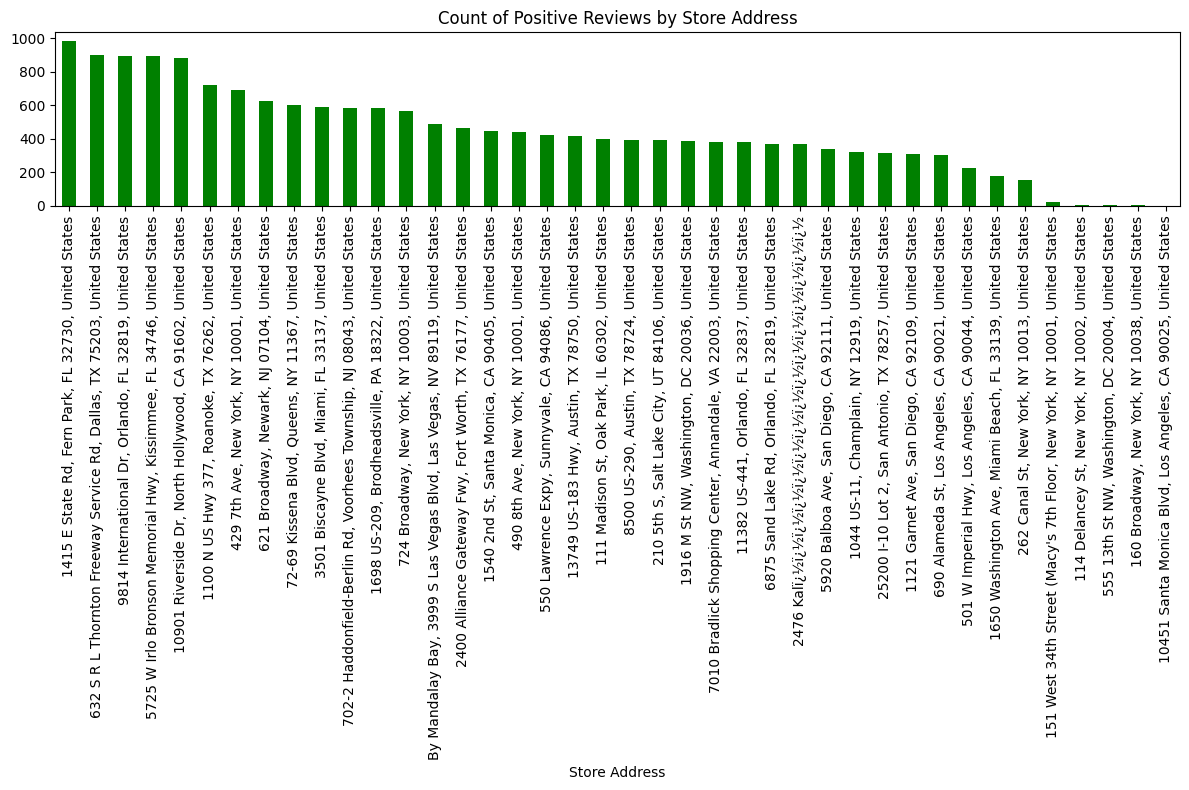

In [27]:
positive_reviews_by_address = df[df['sentiment'] == 'Positive'].groupby('store_address').size()
positive_reviews_by_address_sorted = positive_reviews_by_address.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
positive_reviews_by_address_sorted.plot(kind='bar', color='green')
plt.title('Count of Positive Reviews by Store Address')
plt.xlabel('Store Address')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



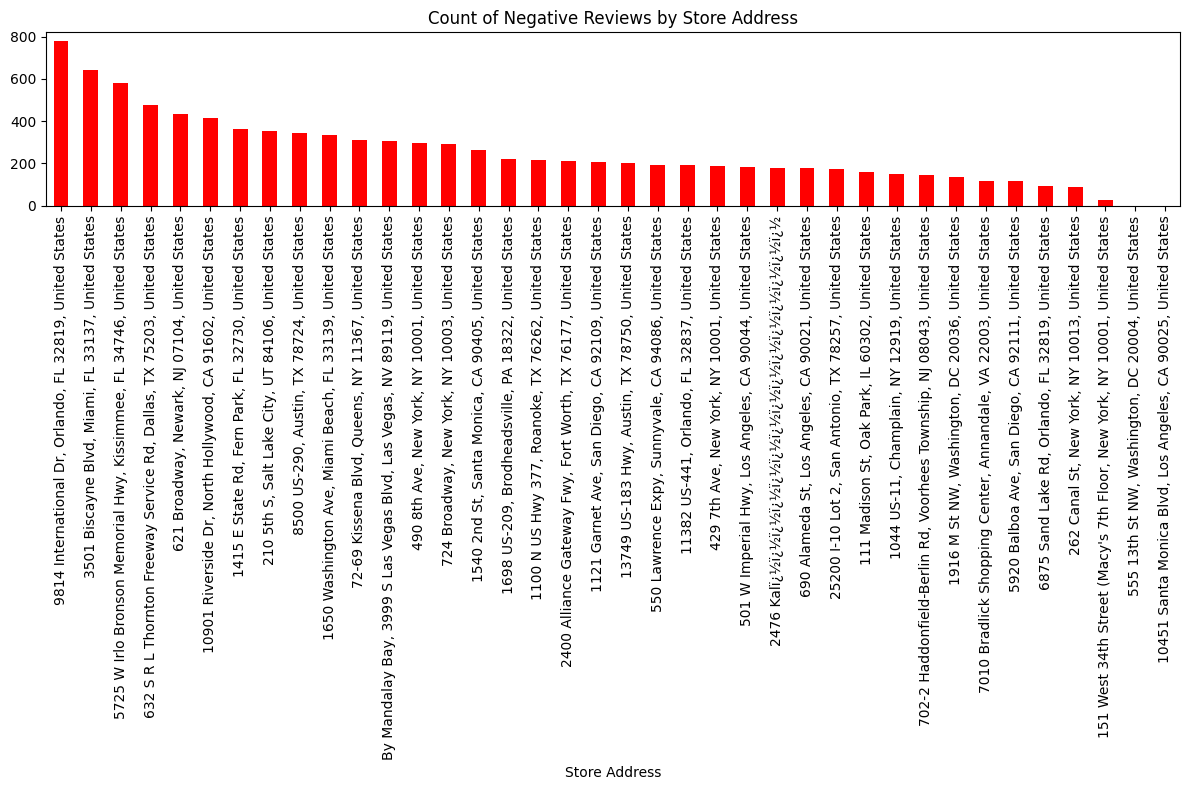

In [28]:
negative_reviews_by_address = df[df['sentiment'] == 'Negative'].groupby('store_address').size()
negative_reviews_by_address_sorted = negative_reviews_by_address.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
negative_reviews_by_address_sorted.plot(kind='bar', color='red')
plt.title('Count of Negative Reviews by Store Address')
plt.xlabel('Store Address')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

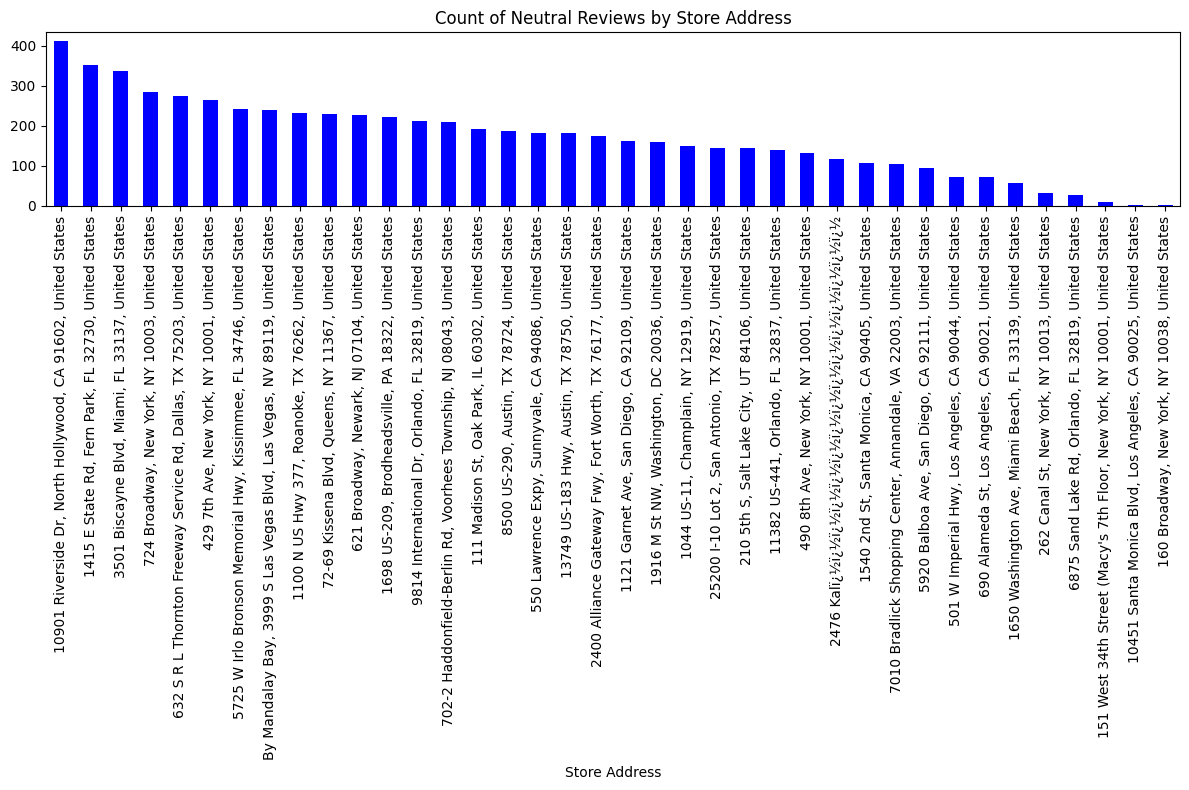

In [29]:
neutral_reviews_by_address = df[df['sentiment'] == 'Neutral'].groupby('store_address').size()
neutral_reviews_by_address_sorted = neutral_reviews_by_address.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
neutral_reviews_by_address_sorted.plot(kind='bar', color='blue')
plt.title('Count of Neutral Reviews by Store Address')
plt.xlabel('Store Address')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

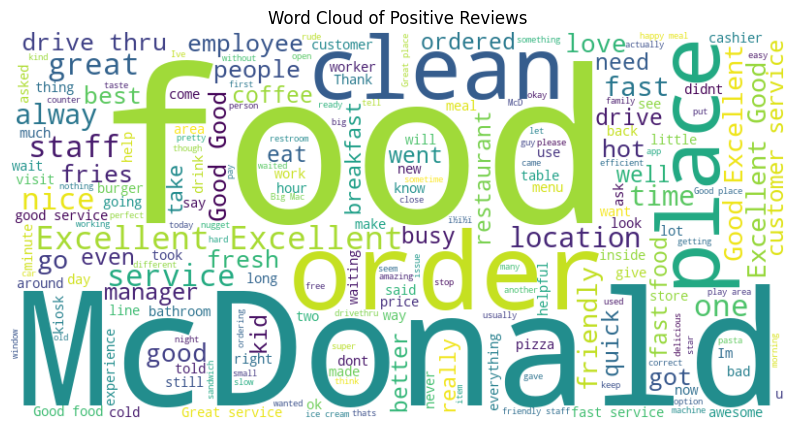

In [30]:
positive_reviews = df[df['sentiment'] == 'Positive']['review']
positive_text = ' '.join(positive_reviews)

# Remove punctuation, numbers, and other non-word characters
clean_positive_text = re.sub(r'[^\w\s]', '', positive_text)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean_positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Positive Reviews')
plt.axis('off')  # Hide axis
plt.show()

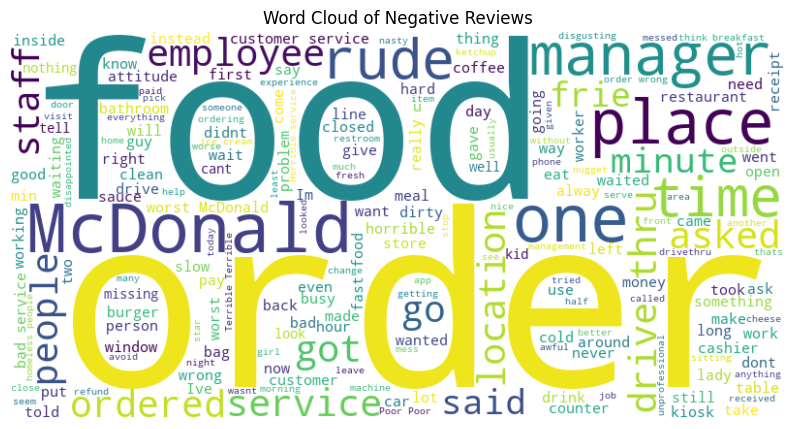

In [31]:
negative_reviews = df[df['sentiment'] == 'Negative']['review']
negative_text = ' '.join(negative_reviews)

clean_negative_text = re.sub(r'[^\w\s]', '', negative_text)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean_negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Negative Reviews')
plt.axis('off')  # Hide axis
plt.show()